In [63]:
# prep: import modules and get pwd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.pyplot import figure
%matplotlib inline
import pymysql
from sqlalchemy import create_engine
import pandas as pd


In [64]:
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [65]:
# get the data
connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)

#list of all table_names in sakila database
query = '''SELECT TABLE_NAME
FROM INFORMATION_SCHEMA.TABLES
WHERE TABLE_TYPE = 'BASE TABLE' AND TABLE_SCHEMA='sakila' ;'''

data = pd.read_sql_query(query, engine)
data.head(60)

,TABLE_NAME
0,actor
1,address
2,category
3,city
4,country
5,customer
6,film
7,film_actor
8,film_category
9,film_text


In [66]:
# 1. Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features. Use the data from 2005.

# data = pd.read_sql_table('film', engine)
# data.head()

# data = pd.read_sql_table('rental', engine)
# data.head()

# data = pd.read_sql_table('inventory', engine)
# data.head()

query = '''select * from rental
join inventory 
using (inventory_id)
join film
using (film_id)
group by film_id;'''

data = pd.read_sql_query(query, engine)
data.head()

,film_id,inventory_id,rental_id,rental_date,customer_id,return_date,staff_id,last_update,store_id,last_update,...,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,1,4863,2005-07-08 19:03:15,431,2005-07-11 21:29:15,2,2006-02-15 21:30:53,1,2006-02-15 05:09:17,...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42
1,2,9,10310,2005-08-01 04:24:47,271,2005-08-04 05:36:47,2,2006-02-15 21:30:53,2,2006-02-15 05:09:17,...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2006-02-15 05:03:42
2,3,12,6999,2005-07-27 01:21:19,224,2005-07-29 20:33:19,2,2006-02-15 21:30:53,2,2006-02-15 05:09:17,...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2006-02-15 05:03:42
3,4,16,6493,2005-07-12 02:40:41,184,2005-07-16 04:56:41,1,2006-02-15 21:30:53,1,2006-02-15 05:09:17,...,2006,1,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2006-02-15 05:03:42
4,5,23,552,2005-05-28 07:53:38,106,2005-06-04 12:45:38,2,2006-02-15 21:30:53,2,2006-02-15 05:09:17,...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2006-02-15 05:03:42


In [67]:
# 2. Create a query to get the list of films and a boolean indicating if it was rented last month (August 2005). This would be our target variable.

query = '''select *,
case when rental_date like '%%2005-08%%' then 1
else 0 end as 'rented_in_Aug_2005?'
from rental
join inventory 
using (inventory_id)
right join film
using (film_id)
group by film_id;'''

data = pd.read_sql_query(query, engine)
data.head()



,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,...,inventory_id,rental_id,rental_date,customer_id,return_date,staff_id,last_update,store_id,last_update,rented_in_Aug_2005?
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,...,1.0,4863.0,2005-07-08 19:03:15,431.0,2005-07-11 21:29:15,2.0,2006-02-15 21:30:53,1.0,2006-02-15 05:09:17,0
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,...,9.0,10310.0,2005-08-01 04:24:47,271.0,2005-08-04 05:36:47,2.0,2006-02-15 21:30:53,2.0,2006-02-15 05:09:17,1
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,...,12.0,6999.0,2005-07-27 01:21:19,224.0,2005-07-29 20:33:19,2.0,2006-02-15 21:30:53,2.0,2006-02-15 05:09:17,0
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,...,16.0,6493.0,2005-07-12 02:40:41,184.0,2005-07-16 04:56:41,1.0,2006-02-15 21:30:53,1.0,2006-02-15 05:09:17,0
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,...,23.0,552.0,2005-05-28 07:53:38,106.0,2005-06-04 12:45:38,2.0,2006-02-15 21:30:53,2.0,2006-02-15 05:09:17,0


In [68]:
# 3. Read the data into a Pandas dataframe.

data = pd.read_sql_query(query, engine)
# data.head()
data.shape

(1000, 23)

In [69]:
# 4. Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables.
data.head()

# I will continue with the following dataset;
# → drop inventory_id, rental_id, rental_date, return_date, last_update, last_update, title, description, release_year, last_update


,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,...,inventory_id,rental_id,rental_date,customer_id,return_date,staff_id,last_update,store_id,last_update,rented_in_Aug_2005?
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,...,1.0,4863.0,2005-07-08 19:03:15,431.0,2005-07-11 21:29:15,2.0,2006-02-15 21:30:53,1.0,2006-02-15 05:09:17,0
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,...,9.0,10310.0,2005-08-01 04:24:47,271.0,2005-08-04 05:36:47,2.0,2006-02-15 21:30:53,2.0,2006-02-15 05:09:17,1
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,...,12.0,6999.0,2005-07-27 01:21:19,224.0,2005-07-29 20:33:19,2.0,2006-02-15 21:30:53,2.0,2006-02-15 05:09:17,0
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,...,16.0,6493.0,2005-07-12 02:40:41,184.0,2005-07-16 04:56:41,1.0,2006-02-15 21:30:53,1.0,2006-02-15 05:09:17,0
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,...,23.0,552.0,2005-05-28 07:53:38,106.0,2005-06-04 12:45:38,2.0,2006-02-15 21:30:53,2.0,2006-02-15 05:09:17,0


In [70]:
data = data.drop(['inventory_id', 'rental_id', 'rental_date', 'return_date', 'last_update', 'last_update', 'title', 'description', 'release_year', 'last_update',
'customer_id','language_id','original_language_id'
], axis=1,)

data.head() 
                      

,film_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,staff_id,store_id,rented_in_Aug_2005?
0,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2.0,1.0,0
1,2,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2.0,2.0,1
2,3,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2.0,2.0,0
3,4,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",1.0,1.0,0
4,5,6,2.99,130,22.99,G,Deleted Scenes,2.0,2.0,0


In [71]:
data.dtypes

film_id                  int64
rental_duration          int64
rental_rate            float64
length                   int64
replacement_cost       float64
rating                  object
special_features        object
staff_id               float64
store_id               float64
rented_in_Aug_2005?      int64
dtype: object

In [72]:
# Change film_id to object as I do not want this influencing the model

data['film_id'] = data.film_id.astype(object)
data

,film_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,staff_id,store_id,rented_in_Aug_2005?
0,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2.0,1.0,0
1,2,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2.0,2.0,1
2,3,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2.0,2.0,0
3,4,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",1.0,1.0,0
4,5,6,2.99,130,22.99,G,Deleted Scenes,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...
995,996,6,0.99,183,9.99,G,"Trailers,Behind the Scenes",2.0,1.0,0
996,997,4,0.99,179,14.99,NC-17,"Trailers,Behind the Scenes",1.0,1.0,0
997,998,6,0.99,105,10.99,NC-17,Deleted Scenes,1.0,2.0,0
998,999,5,2.99,101,28.99,R,"Trailers,Deleted Scenes",1.0,1.0,0


In [73]:
# Split special_features column into the respective features

data = pd.concat([data, data['special_features'].str.split(',', expand=True)], axis=1)
data

,film_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,staff_id,store_id,rented_in_Aug_2005?,0,1,2,3
0,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2.0,1.0,0,Deleted Scenes,Behind the Scenes,None,None
1,2,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2.0,2.0,1,Trailers,Deleted Scenes,None,None
2,3,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2.0,2.0,0,Trailers,Deleted Scenes,None,None
3,4,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",1.0,1.0,0,Commentaries,Behind the Scenes,None,None
4,5,6,2.99,130,22.99,G,Deleted Scenes,2.0,2.0,0,Deleted Scenes,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,6,0.99,183,9.99,G,"Trailers,Behind the Scenes",2.0,1.0,0,Trailers,Behind the Scenes,None,None
996,997,4,0.99,179,14.99,NC-17,"Trailers,Behind the Scenes",1.0,1.0,0,Trailers,Behind the Scenes,None,None
997,998,6,0.99,105,10.99,NC-17,Deleted Scenes,1.0,2.0,0,Deleted Scenes,None,None,None
998,999,5,2.99,101,28.99,R,"Trailers,Deleted Scenes",1.0,1.0,0,Trailers,Deleted Scenes,None,None


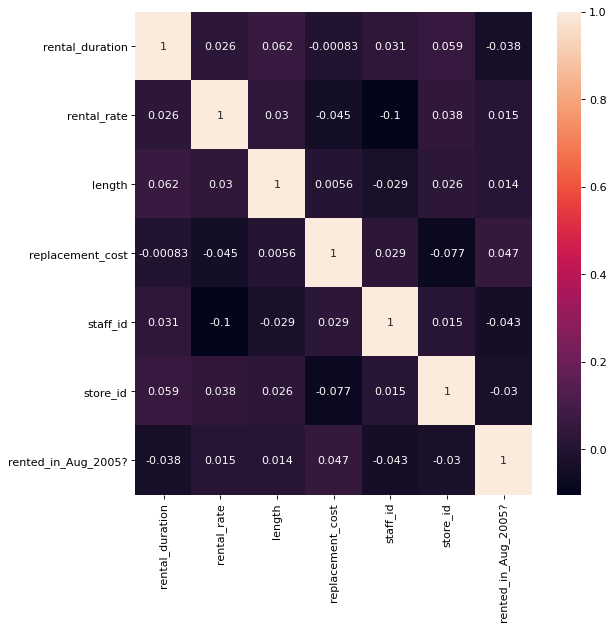

In [74]:
figure(figsize=(8, 8), dpi=80)

correlations_matrix = data.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()


# From this correlation matrix, there are no strong correlations noted.

In [75]:
data.shape

(1000, 14)

In [76]:
# The following columns I considered to be categorical information, and transformed them with the OneHotEncoder:

#1.
Cat_OneHotEncoder = data[['rental_duration','rating','staff_id','store_id',0,1,2,3]]
Cat_OneHotEncoder

# 2.
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(Cat_OneHotEncoder)
categoricals_array = encoder.transform(Cat_OneHotEncoder).toarray()
# onehot_encoded = pd.DataFrame(encoded,columns=encoder.categories_)
# onehot_encoded.head()

# 3. 
final_columns = list()
to_drop_columns = list()      
         
for columns in encoder.categories_:
    condition = True
    for column in columns.tolist():
        if condition:
            to_drop_columns.append(column)
            final_columns.append(column)
            condition = False
        else:
            final_columns.append(column) 

# 4.            
categoricals_df = pd.DataFrame(data = categoricals_array, columns = final_columns)
# categoricals_df.columns = map(str.lower, categoricals_df.columns)
categoricals_df

new = categoricals_df.groupby(by=categoricals_df.columns, axis=1).sum()
new


# 5. Processing Data: Concat DataFrames
data_all = pd.concat([data,new], axis = 1)
data_all.head()


,film_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,staff_id,store_id,rented_in_Aug_2005?,...,7,Behind the Scenes,Commentaries,Deleted Scenes,G,NC-17,PG,PG-13,R,Trailers
0,1,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2.0,1.0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2.0,2.0,1,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2.0,2.0,0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",1.0,1.0,0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,6,2.99,130,22.99,G,Deleted Scenes,2.0,2.0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [77]:
data_all.head().T

,0,1,2,3,4
film_id,1,2,3,4,5
rental_duration,6,3,7,5,6
rental_rate,0.99,4.99,2.99,2.99,2.99
length,86,48,50,117,130
replacement_cost,20.99,12.99,18.99,26.99,22.99
rating,PG,G,NC-17,G,G
special_features,"Deleted Scenes,Behind the Scenes","Trailers,Deleted Scenes","Trailers,Deleted Scenes","Commentaries,Behind the Scenes",Deleted Scenes
staff_id,2.0,2.0,2.0,1.0,2.0
store_id,1.0,2.0,2.0,1.0,2.0
rented_in_Aug_2005?,0,1,0,0,0


In [78]:
# Here I drop all the original columns before the OneHotEncoder process:

data_all = data_all.drop(['special_features','rental_duration','rating','staff_id','store_id',0,1,2,3], axis = 1)

In [86]:
data_all

,film_id,rental_rate,length,replacement_cost,rented_in_Aug_2005?,4,5,6,7,Behind the Scenes,Commentaries,Deleted Scenes,G,NC-17,PG,PG-13,R,Trailers
0,1,0.99,86,20.99,0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2,4.99,48,12.99,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3,2.99,50,18.99,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,4,2.99,117,26.99,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,2.99,130,22.99,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0.99,183,9.99,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,997,0.99,179,14.99,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
997,998,0.99,105,10.99,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
998,999,2.99,101,28.99,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [87]:
# There is some scaling needed looking at certain columns containing larger values.  As the OneHotEncoder columns and boolean column are already 0 to 1,
# I applied the MinMaxScaler on the total df excluding the film_id.

from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X = data_all.drop(['film_id'], axis = 1)

# Scaling data
transformer = MinMaxScaler().fit(X)
x_normalized = transformer.transform(X)
x = pd.DataFrame(x_normalized, columns=X.columns)


In [88]:
x.head()

,rental_rate,length,replacement_cost,rented_in_Aug_2005?,4,5,6,7,Behind the Scenes,Commentaries,Deleted Scenes,G,NC-17,PG,PG-13,R,Trailers
0,0.0,0.287770,0.55,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.014388,0.15,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.5,0.028777,0.45,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.5,0.510791,0.85,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.5,0.604317,0.65,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [89]:
missing = pd.DataFrame(data_all['film_id'])

In [90]:
# 5. Create a logistic regression model to predict this variable from the cleaned data.

# build X and y
y = data_all['rented_in_Aug_2005?']
X = np.concatenate((x.drop(['rented_in_Aug_2005?'], axis = 1), missing), axis = 1)


In [91]:
X

array([[0.0, 0.2877697841726619, 0.5499999999999998, ..., 0.0, 0.0, 1],
       [1.0, 0.014388489208633115, 0.15000000000000002, ..., 0.0, 1.0, 2],
       [0.5, 0.02877697841726623, 0.44999999999999996, ..., 0.0, 1.0, 3],
       ...,
       [0.0, 0.42446043165467634, 0.04999999999999993, ..., 0.0, 0.0,
        998],
       [0.5, 0.3956834532374101, 0.95, ..., 1.0, 1.0, 999],
       [1.0, 0.02877697841726623, 0.44999999999999996, ..., 0.0, 1.0,
        1000]], dtype=object)

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='ovr').fit(X_train, y_train)

C:\Users\renev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='ovr').fit(X_train, y_train)

C:\Users\renev\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [95]:
predictions = classification.predict(X_test)
classification.score(X_test, y_test)

0.9333333333333333

In [96]:
# solver='lbfgs' and solver='saga' were giving warnings, so I tried solver='liblinear':

In [97]:
# Model 1:

classification = LogisticRegression(random_state=0, solver='liblinear',
                  multi_class='ovr').fit(X_train, y_train)

In [98]:
predictions = classification.predict(X_test)
classification.score(X_test, y_test)

0.9333333333333333

In [99]:
pd.Series(predictions).value_counts()

0    300
dtype: int64

In [100]:
# I also tried the KNN model:

In [101]:
# Model 2:

from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf.fit(X, y)
predictions_clf = clf.predict(X_test)
clf.score(X_test, y_test)

0.94

In [102]:
# 6. Evaluate the results.

In [103]:
print(y_test.value_counts())

0    280
1     20
Name: rented_in_Aug_2005?, dtype: int64


In [104]:
# Model 1:  
# Model has a score of 0.9333, and all predictions were for false (not rented in Aug 2005), where 20/300 were rented.

pd.Series(predictions).value_counts()

0    300
dtype: int64

In [105]:
# Model 2:  
# Model has a score of 0.94, which slightly improves the predictions.

pd.Series(predictions_clf).value_counts()

0    294
1      6
dtype: int64

In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[280,   0],
       [ 20,   0]], dtype=int64)

In [107]:
confusion_matrix(y_test, predictions_clf)

array([[278,   2],
       [ 16,   4]], dtype=int64)

In [108]:
# predicted | 0 | 1 | 
# --------------------------
# actual  0 | + |  |   
# --------------------------
#         1 |   | + |   
# --------------------------